## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  55.721886  1668.337965  0.745627  2.556061  1.533333
1  53.786273   352.341995  0.585778  1.651438  1.332304
2  31.038954  1686.328006  0.525892  8.974257  1.462635
3  82.822464  1627.219246  0.995211  1.994241  1.600825
4  18.802560  1755.145617  0.302269  2.646284  1.615866


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9696662	total: 69.4ms	remaining: 1m 9s
1:	learn: 0.9614586	total: 69.8ms	remaining: 34.9s
2:	learn: 0.9543415	total: 70.3ms	remaining: 23.4s
3:	learn: 0.9470499	total: 71ms	remaining: 17.7s
4:	learn: 0.9391146	total: 71.4ms	remaining: 14.2s
5:	learn: 0.9311289	total: 71.9ms	remaining: 11.9s
6:	learn: 0.9212011	total: 72.3ms	remaining: 10.3s
7:	learn: 0.9117491	total: 73ms	remaining: 9.05s
8:	learn: 0.9040300	total: 73.6ms	remaining: 8.1s
9:	learn: 0.8938821	total: 74.2ms	remaining: 7.34s
10:	learn: 0.8869377	total: 74.8ms	remaining: 6.72s
11:	learn: 0.8808699	total: 75.3ms	remaining: 6.2s
12:	learn: 0.8736039	total: 75.7ms	remaining: 5.75s
13:	learn: 0.8672707	total: 76.2ms	remaining: 5.37s
14:	learn: 0.8572794	total: 76.7ms	remaining: 5.03s
15:	learn: 0.8498211	total: 77.1ms	remaining: 4.74s
16:	learn: 0.8411711	total: 77.6ms	remaining: 4.49s
17:	learn: 0.8346679	total: 78.1ms	remaining: 4.26s
18:	learn: 0.8277224	total: 78.7ms	remaining: 4.06

88:	learn: 0.4882113	total: 109ms	remaining: 1.11s
89:	learn: 0.4840919	total: 109ms	remaining: 1.1s
90:	learn: 0.4812125	total: 110ms	remaining: 1.1s
91:	learn: 0.4787949	total: 110ms	remaining: 1.09s
92:	learn: 0.4756036	total: 111ms	remaining: 1.08s
93:	learn: 0.4724724	total: 111ms	remaining: 1.07s
94:	learn: 0.4698261	total: 111ms	remaining: 1.06s
95:	learn: 0.4670236	total: 112ms	remaining: 1.05s
96:	learn: 0.4645440	total: 112ms	remaining: 1.04s
97:	learn: 0.4610354	total: 113ms	remaining: 1.04s
98:	learn: 0.4585784	total: 113ms	remaining: 1.03s
99:	learn: 0.4553622	total: 114ms	remaining: 1.02s
100:	learn: 0.4529103	total: 114ms	remaining: 1.01s
101:	learn: 0.4507583	total: 114ms	remaining: 1.01s
102:	learn: 0.4480667	total: 115ms	remaining: 999ms
103:	learn: 0.4457993	total: 115ms	remaining: 993ms
104:	learn: 0.4431060	total: 116ms	remaining: 986ms
105:	learn: 0.4398474	total: 116ms	remaining: 978ms
106:	learn: 0.4366387	total: 116ms	remaining: 971ms
107:	learn: 0.4339188	tota

273:	learn: 0.2089661	total: 186ms	remaining: 492ms
274:	learn: 0.2082059	total: 186ms	remaining: 491ms
275:	learn: 0.2076386	total: 187ms	remaining: 489ms
276:	learn: 0.2067939	total: 187ms	remaining: 488ms
277:	learn: 0.2057964	total: 188ms	remaining: 487ms
278:	learn: 0.2047020	total: 188ms	remaining: 485ms
279:	learn: 0.2035928	total: 188ms	remaining: 484ms
280:	learn: 0.2025585	total: 189ms	remaining: 483ms
281:	learn: 0.2015638	total: 189ms	remaining: 482ms
282:	learn: 0.2009627	total: 190ms	remaining: 480ms
283:	learn: 0.2003591	total: 190ms	remaining: 479ms
284:	learn: 0.1996041	total: 191ms	remaining: 478ms
285:	learn: 0.1986215	total: 191ms	remaining: 477ms
286:	learn: 0.1977844	total: 192ms	remaining: 476ms
287:	learn: 0.1969991	total: 192ms	remaining: 475ms
288:	learn: 0.1961056	total: 192ms	remaining: 474ms
289:	learn: 0.1950181	total: 193ms	remaining: 472ms
290:	learn: 0.1946493	total: 193ms	remaining: 471ms
291:	learn: 0.1939620	total: 194ms	remaining: 470ms
292:	learn: 

510:	learn: 0.0971013	total: 290ms	remaining: 278ms
511:	learn: 0.0968924	total: 291ms	remaining: 277ms
512:	learn: 0.0966993	total: 291ms	remaining: 276ms
513:	learn: 0.0963939	total: 292ms	remaining: 276ms
514:	learn: 0.0961935	total: 292ms	remaining: 275ms
515:	learn: 0.0960114	total: 292ms	remaining: 274ms
516:	learn: 0.0958171	total: 293ms	remaining: 274ms
517:	learn: 0.0956270	total: 293ms	remaining: 273ms
518:	learn: 0.0953450	total: 294ms	remaining: 272ms
519:	learn: 0.0950536	total: 294ms	remaining: 271ms
520:	learn: 0.0948686	total: 295ms	remaining: 271ms
521:	learn: 0.0946677	total: 295ms	remaining: 270ms
522:	learn: 0.0945174	total: 296ms	remaining: 270ms
523:	learn: 0.0943416	total: 296ms	remaining: 269ms
524:	learn: 0.0940462	total: 297ms	remaining: 268ms
525:	learn: 0.0938746	total: 297ms	remaining: 268ms
526:	learn: 0.0936018	total: 297ms	remaining: 267ms
527:	learn: 0.0934339	total: 298ms	remaining: 266ms
528:	learn: 0.0931597	total: 298ms	remaining: 266ms
529:	learn: 

680:	learn: 0.0620826	total: 368ms	remaining: 172ms
681:	learn: 0.0619399	total: 369ms	remaining: 172ms
682:	learn: 0.0617076	total: 369ms	remaining: 171ms
683:	learn: 0.0615622	total: 369ms	remaining: 171ms
684:	learn: 0.0613776	total: 370ms	remaining: 170ms
685:	learn: 0.0612283	total: 370ms	remaining: 169ms
686:	learn: 0.0611837	total: 371ms	remaining: 169ms
687:	learn: 0.0609737	total: 371ms	remaining: 168ms
688:	learn: 0.0608651	total: 372ms	remaining: 168ms
689:	learn: 0.0606427	total: 372ms	remaining: 167ms
690:	learn: 0.0605370	total: 372ms	remaining: 167ms
691:	learn: 0.0603200	total: 373ms	remaining: 166ms
692:	learn: 0.0602165	total: 373ms	remaining: 165ms
693:	learn: 0.0600048	total: 374ms	remaining: 165ms
694:	learn: 0.0597914	total: 374ms	remaining: 164ms
695:	learn: 0.0597573	total: 375ms	remaining: 164ms
696:	learn: 0.0596366	total: 375ms	remaining: 163ms
697:	learn: 0.0594327	total: 375ms	remaining: 162ms
698:	learn: 0.0592693	total: 376ms	remaining: 162ms
699:	learn: 

914:	learn: 0.0398360	total: 472ms	remaining: 43.8ms
915:	learn: 0.0397390	total: 472ms	remaining: 43.3ms
916:	learn: 0.0396384	total: 473ms	remaining: 42.8ms
917:	learn: 0.0395781	total: 473ms	remaining: 42.3ms
918:	learn: 0.0394757	total: 474ms	remaining: 41.8ms
919:	learn: 0.0393771	total: 474ms	remaining: 41.2ms
920:	learn: 0.0393182	total: 475ms	remaining: 40.7ms
921:	learn: 0.0392214	total: 475ms	remaining: 40.2ms
922:	learn: 0.0391606	total: 475ms	remaining: 39.7ms
923:	learn: 0.0390667	total: 476ms	remaining: 39.1ms
924:	learn: 0.0390064	total: 476ms	remaining: 38.6ms
925:	learn: 0.0389469	total: 477ms	remaining: 38.1ms
926:	learn: 0.0388514	total: 477ms	remaining: 37.6ms
927:	learn: 0.0387559	total: 477ms	remaining: 37ms
928:	learn: 0.0386619	total: 478ms	remaining: 36.5ms
929:	learn: 0.0385706	total: 478ms	remaining: 36ms
930:	learn: 0.0385114	total: 479ms	remaining: 35.5ms
931:	learn: 0.0384529	total: 479ms	remaining: 35ms
932:	learn: 0.0383579	total: 480ms	remaining: 34.4ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

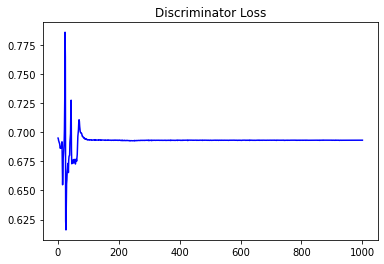

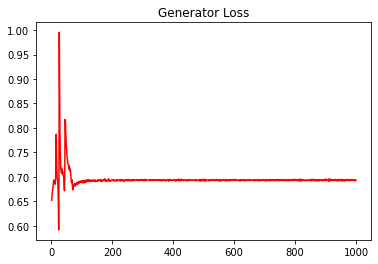

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.6151201777854721


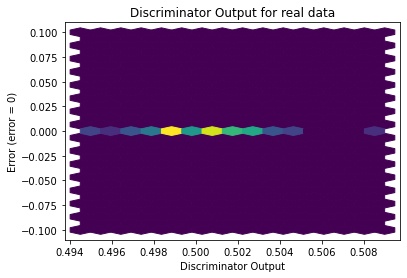

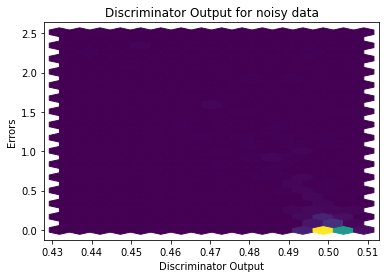

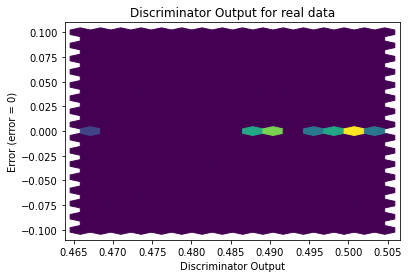

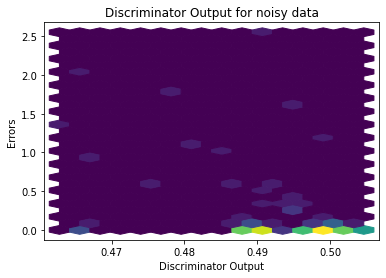

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


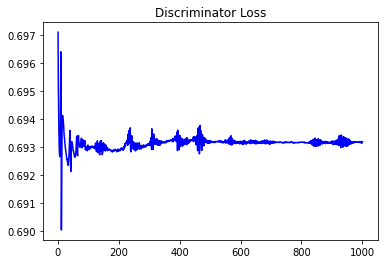

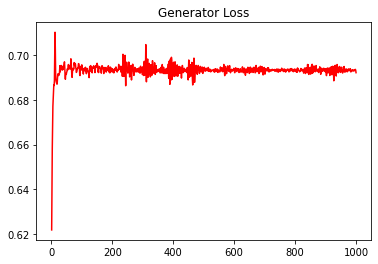

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.6289059682969211


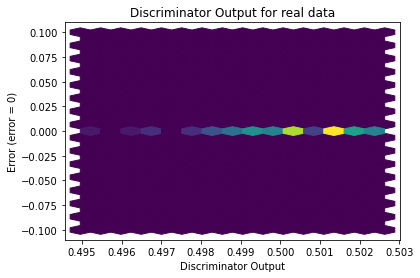

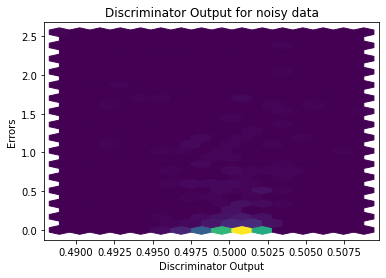

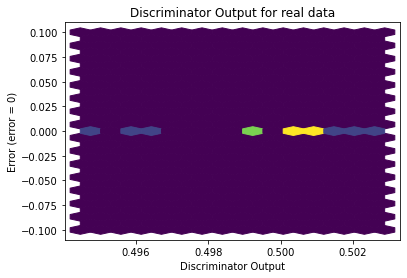

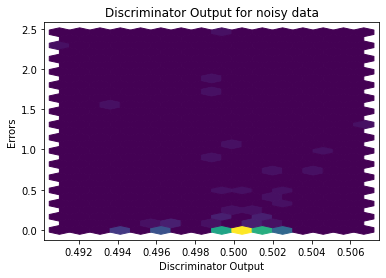

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0649]], requires_grad=True)
